In [4]:
from tbparse import SummaryReader
log_dir = "runs"
reader = SummaryReader(log_dir, extra_columns={'dir_name'})
df = reader.scalars

In [61]:
def smooth_series(series, window_size=50):
    return series.rolling(window=window_size).mean()


In [39]:
triplets = []
lstms = []
for dir_name, group in df.groupby('dir_name'):
    if ("128" in dir_name):
        if ("triplet" in dir_name):
            triplets.append(group)
        if ("lstm" in dir_name or "baseline" in dir_name):
            lstms.append(group)
    if ("baseline" in dir_name):
        lstms.append(group)

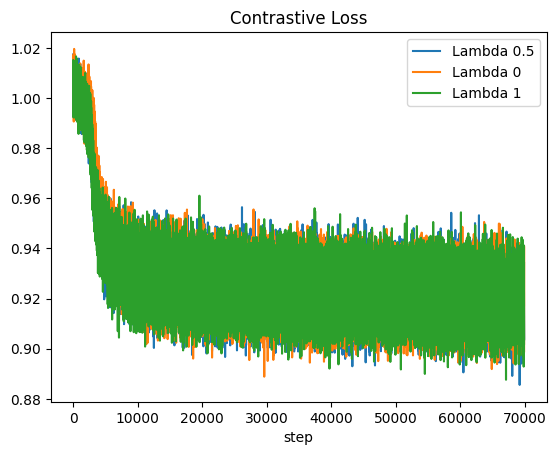

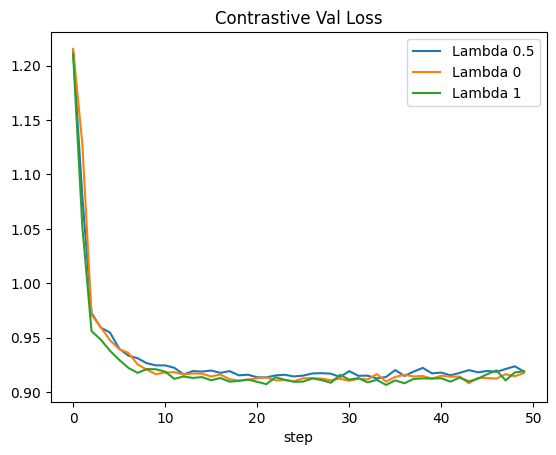

In [31]:
tags = triplets[0].tag.unique()
for tag in tags:
    tag_plot = []
    for group in triplets:
        tag_plot.append(group[group.tag == tag].set_index('step').value)
    tag_plot = pd.concat(tag_plot, axis=1)
    tag_plot.columns = ["Lambda "+ group.dir_name.iloc[0].split("_")[1] for group in triplets]
    tag_plot.plot(title=f"Contrastive {tag}")
    plt.savefig(f"runs/{tag}_triplet.png")
    plt.show()

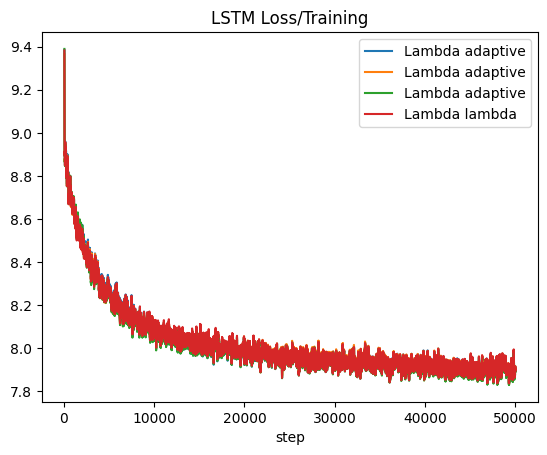

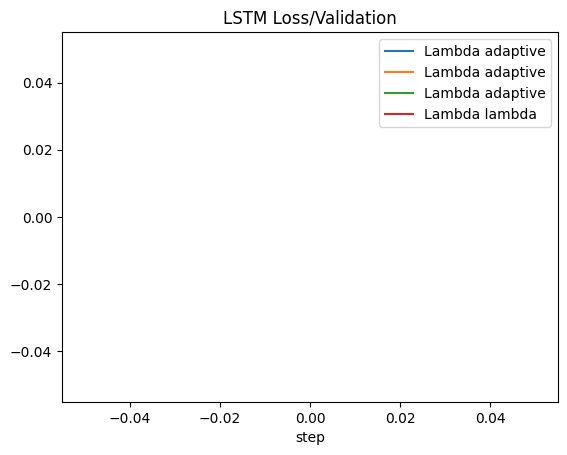

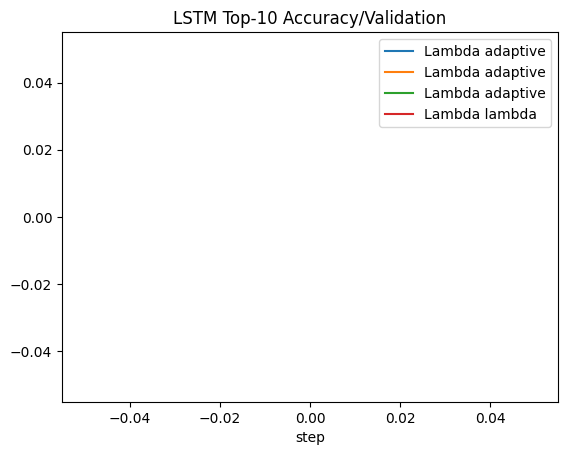

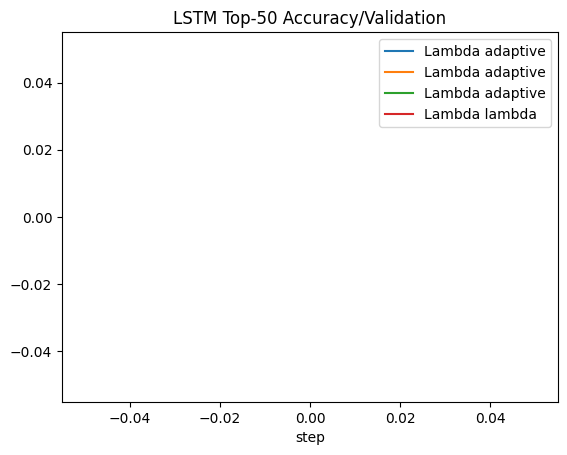

In [62]:
tags = lstms[0].tag.unique()
for tag in tags:
    tag_plot = []
    min_steps = float('inf')
    
    # Find the minimum number of steps across all runs
    for group in lstms:
        steps = group[group.tag == tag].step.unique()
        min_steps = min(min_steps, steps.max())
    
    # Collect the data truncated to the minimum number of steps
    for group in lstms:
        truncated_group = group[(group.tag == tag) & (group.step <= min_steps)]
        smoothed_values = smooth_series(truncated_group.drop_duplicates(subset='step', keep='last').set_index('step').value)
        tag_plot.append(smoothed_values)
    
    # Concatenate and plot the data
    tag_plot = pd.concat(tag_plot, axis=1)
    tag_plot.columns = ["Lambda " + group.dir_name.iloc[0].split("_")[1] for group in lstms]
    tag_plot.plot(title=f"LSTM {tag}")
    # plt.savefig(f"runs/{tag}_lstm.png")
    plt.show()



In [41]:
for i in range(len(lstms)):
    print(lstms[i].tag.unique())

['Loss/Training' 'Loss/Validation' 'Top-10 Accuracy/Validation'
 'Top-50 Accuracy/Validation']
['Loss/Training' 'Loss/Validation' 'Top-10 Accuracy/Validation'
 'Top-50 Accuracy/Validation']
['Loss/Training' 'Loss/Validation' 'Top-10 Accuracy/Validation'
 'Top-50 Accuracy/Validation']
['Loss/Training' 'Loss/Validation' 'Top-10 Accuracy/Validation'
 'Top-50 Accuracy/Validation']


In [67]:
optims = []
for dir_name, group in df.groupby('dir_name'):
    if ("ADAM" in dir_name or "RMS" in dir_name or "triplet_0.5_SGD_0.001_momentum_0.9_wd_1e-6_batch1024_vec256" == dir_name):
        optims.append(group)

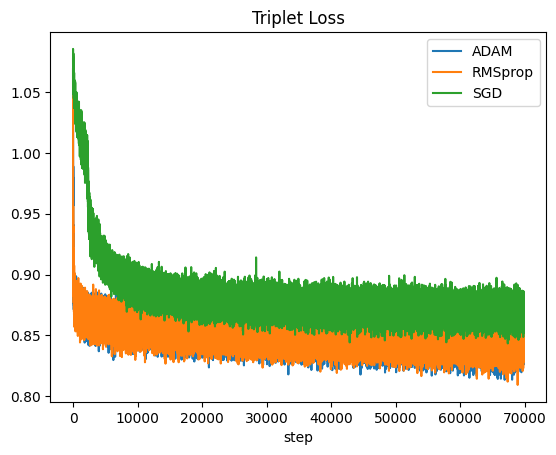

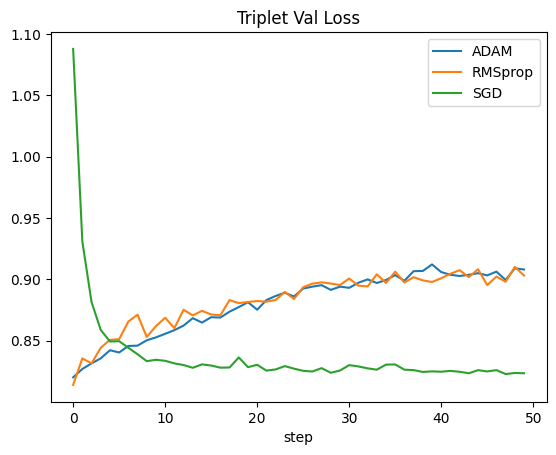

In [69]:
tags = optims[0].tag.unique()
for tag in tags:
    tag_plot = []
    min_steps = float('inf')
    
    # Find the minimum number of steps across all runs
    for group in optims:
        steps = group[group.tag == tag].step.unique()
        min_steps = min(min_steps, steps.max())
    
    # Collect the data truncated to the minimum number of steps
    for group in optims:
        truncated_group = group[(group.tag == tag) & (group.step <= min_steps)]
        tag_plot.append(truncated_group.drop_duplicates(subset='step', keep='last').set_index('step').value)
    # Concatenate and plot the data
    tag_plot = pd.concat(tag_plot, axis=1)
    tag_plot.columns = ["ADAM", "RMSprop", "SGD"]
    tag_plot.plot(title=f"Triplet {tag}")
    plt.savefig(f"runs/{('_').join(tag.split('/'))}_triplet.png")
    plt.show()
